<a href="https://colab.research.google.com/github/IgorFC1/Escada/blob/master/Sorvete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
       DADOS

Input (X): Temperatura
Output (Y): Lucro (revenue)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.3.0'

In [ ]:
sales_df = pd.read_csv('SalesData.csv')

In [ ]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


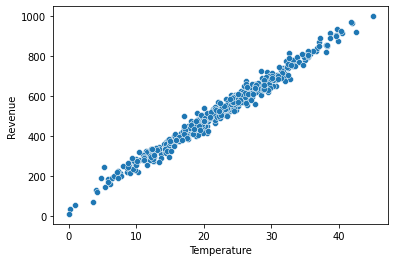

In [ ]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue']);

In [ ]:
x_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [ ]:
x_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units= 1))

In [ ]:
model.summary(2)

Model: "sequential_7"
__
 P
==
 2
__
 1
==
Total params: 31
Trainable params: 31
Non-trainable params: 0
__


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
16/16 [==============================] - 0s 971us/step - loss: 145788.7031
Epoch 2/100
16/16 [==============================] - 0s 876us/step - loss: 14879.5879
Epoch 3/100
16/16 [==============================] - 0s 945us/step - loss: 3771.4705
Epoch 4/100
16/16 [==============================] - 0s 945us/step - loss: 1524.5959
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 770.7626
Epoch 6/100
16/16 [==============================] - 0s 983us/step - loss: 706.1962
Epoch 7/100
16/16 [==============================] - 0s 959us/step - loss: 689.4012
Epoch 8/100
16/16 [==============================] - 0s 933us/step - loss: 683.9461
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 679.3552
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 673.7400
Epoch 11/100
16/16 [==============================] - 0s 1ms/step - loss: 679.6642
Epoch 12/100
16/16 [==============================] - 0s 1ms/step - loss: 6

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

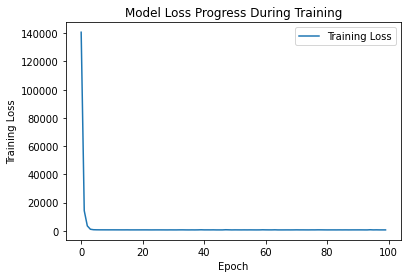

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [ ]:
model.get_weights()

[array([[ 1.8692087 ,  0.95040286,  1.9785155 ,  1.7232246 , -0.5576683 ,
         -1.6408222 , -0.9372475 ,  1.2922213 , -1.9899322 ,  0.4269185 ]],
       dtype=float32),
 array([ 3.2170568,  2.8253243,  3.3792977,  3.1525161, -2.2409747,
        -3.2622004, -2.4111817,  2.6800685, -3.3759744,  1.7970499],
       dtype=float32),
 array([[ 2.2096336 ],
        [ 0.9663053 ],
        [ 1.7617172 ],
        [ 2.227263  ],
        [-0.57131565],
        [-1.5415162 ],
        [-1.1189604 ],
        [ 1.3224807 ],
        [-1.6217506 ],
        [ 0.4673737 ]], dtype=float32),
 array([2.7976563], dtype=float32)]

In [ ]:
temp = 5
revenue = model.predict([temp])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[151.50066]]


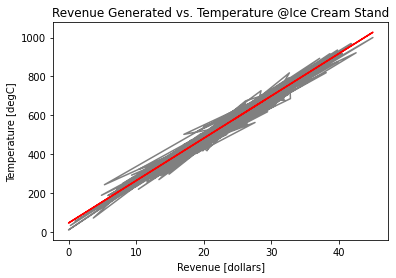

In [ ]:
plt.plot(x_train, y_train, color = 'gray')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.xlabel('Revenue [dollars]')
plt.ylabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');